# IN1160 – Oblig 1b: Klassifisering

**Våren 2026**

Det er en god idé å lese gjennom hele oppgavesettet før dere setter i gang.
Dersom dere har spørsmål så kan dere:

- gå i gruppetime,
- spørre på Discourse
- eller sende epost til in1160-hjelp@ifi.uio.no dersom alternativene over av en eller annen grunn ikke passer for spørsmålet.


## Innlevering

Oppgaven leveres innen 25.02. klokken 23.59 i [Devilry](https://devilry.ifi.uio.no/).

Innleveringen skal bestå av én Jupyter notebook med både kode og tilhørende forklaringer. **Før innlevering skal du kjøre gjennom hele notebooken, før du lagrer siste gang. Den bør kjøre uten å feile og vise den grafikken og de utskriftene som skal være med.**

Vi understreker at innlevering av kode alene ikke er nok for å bestå oppgaven – vi forventer at notebooken også skal inneholde kommentarer (på norsk eller engelsk) på hva dere har gjort og begrunnelser for valgene dere har tatt underveis.
La enhver oblig bli en trening i å formidle forskning. Bruk helst hele setninger, og matematiske formler om nødvendig. Resultater skal presenteres i tabeller på en oversiktlig måte.
Det å forklare med egne ord, bruke begreper vi har gått gjennom på forelesningene og å forklare og reflektere over løsningene deres er en viktig del av læringsprosessen – ta det på alvor!

Når det gjelder bruk av generative prateroboter (ChatGPT og lignende): Dere kan bruke dem som en "sparringspartner", for eksempel for å forklare noe dere ikke helt har forstått. Dere har imidlertid ikke lov til å bruke dem til å generere løsninger (enten delvis eller fullstendig) til noen av oppgavene. Funksjoner for automatisk skriving av kode, som Copilot i VS Code, må derfor også være deaktivert mens dere jobber på obligen.  
Bruker dere KI-verktøy vil vi også at dere kort beskriver hvordan dere har brukt dem under arbeidet med oppgaven.

Det er ikke mulighet for omlevering av obliger som ikke bestås.


## Bakgrunn

I oblig 1a lagde dere vektorer for ord. Disse baserte seg på hvilke andre ord vi fant i setningen til ordet. Vi så videre at vi kan bruke cosinuslikhet til beregne hvor like to ordvektorer er. 
I denne obligen skal vi benytte oss av lignende metoder, men løfte blikket fra setningsnivå til dokumentnivå for å gjøre dokumentklassifisering.

Vi skal jobbe med datasettet Norwegian Review Corpus (NoReC) som består av anmeldelser hentet fra en rekke norske nettaviser.
Dette datasettet består av over 43 000 dokumenter blant annet tagget med hvilket tema dokumentet diskuterer, som f.eks. musikk, film og TV, spill og restauranter.

En full rad av NoReC er tagget slik:

| id | split | rating | category | day | month | year | excerpt | language | source | authors | title | url | text |
|--------|-------|---|-------|---|---|------|----|----|--------|--------------|---------|------------|---------|
| 001160 | train | 4 | music | 3 | 7 | 2009 | nb | p3 | Andreas Øverland | Ikke helt rett West | https://p3.no/musikk/kategori/anmeldelser/ikke-helt-rett-west | Ikke helt rett West | Kanye West, Roskilde ... |


Mer info finner dere sammen med datasettet [her](https://huggingface.co/datasets/ltg/norec_document).


## Oppgave 1 – Forberede data

I denne oppgaven skal dere laste inn NoReC-datasettet, for å så dele det inn i splitter til trening, validering og testing. 
For å hente hente NoReC-datasettet bruker dere funksjonen `load_dataset()`, som vist her:

In [1]:
from datasets import load_dataset

dataset = load_dataset("ltg/norec")

/Users/bruker/Desktop/Projects/ML-AI/mlai_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 34749 examples [00:00, 259947.94 examples/s]
Generating validation split: 4348 examples [00:00, 280079.77 examples/s]
Generating test split: 4340 examples [00:00, 237467.12 examples/s]


### Oppgave 1.1 – Oppdeling av datasett (3 poeng)

Dere skal nå hente ut ønsket data fra datasettet. Dette skal dere gjøre med funksjonen `prepare_data()`.
Denne funksjonen tar inn datasettet og en spesifisert splitt som argumenter og skal returnere to lister: en liste med dokumenttekster og en liste med den respektive kategorien for hvert av dokumentene.
Det er viktig at disse følger hverandre – altså at kategorien for teksten på indeks $i$ i dokumentlista finnes på indeks $i$ i kategorilista. Listene skal derfor også ha samme lengde.

Datasettet er strukturert som en ordbok. For hver av nøklene 'train', 'validation' og 'test' vil dere finne en ny ordbok som blant annet har nøklene 'category' og 'text'.

For å begrense omfanget av dataene vår skal vi begrense oss til kategoriene 'games', 'restaurants' og 'literature'. Tekster og tagger fra alle andre kategorier skal dere altså ikke ta med videre.

Skriv ferdig funksjonen `prepare_data()`.


In [2]:
# Oppgave 1.1
def prepare_data(dataset, split):
    """Henter ønsket data fra datasettet.

    Argumenter:
    - dataset : NoReC-datasettet.
    - split   : En streng som spesifiserer hvilken splitt vi ønsker.

    Returnerer:
    - data   : En liste over dokument-tekstene fra spesifisert splitt.
    - labels : En liste over hvilken kategori dokumentet tilhører.

    De returnerte listene skal være like lange og ha samme rekkefølge.
    For dokumentet på data[i] skal vi altså kunne finne det tilhørende
    kategori i labels[i].

    TODO: Put as comments:
    dataset er en ordbok som har nøklene "train", "validation" og "test".
    dataset[split] gir oss en ny ordbok for split-en, som inneholder:
        - split_dict["text"] som er en liste med tekster
        - split_dict["category"] som er en liste med kategorier.
    Vi ønsker å returnere to lister, data og labels, som inneholder kategoriene i fokus, har samme lengde og rekkefølge, som gjøres ved data[i] og labels[i] operasjonen. Dette gjøres ved zip() funksjonen som iterer parvis gjennom datasetttet, vi tar med category rett etter text hver gang cat in focus, slik at antall blir likt.
    """

    focus = {"games", "restaurants", "literature"}

    data = []
    labels = []

    split_dict = dataset[split] # f.eks: dataset["train"]
    for text, cat in zip(split_dict["text"], split_dict["category"]):
        if cat in focus:
            data.append(text)
            labels.append(cat)
    return data, labels

In [15]:
# Etter å ha implementert `prepare_data()` skal dere kunne dele opp dataene slik:
# Treningsdata
train_data, train_labels = prepare_data(dataset, "train")

# Valideringsdata
dev_data, dev_labels = prepare_data(dataset, "validation")

# Testdata
test_data, test_labels = prepare_data(dataset, "test")

### Oppgave 1.2 – Analyse av splitter (2 poeng)

Nå som dere har delt opp datasettet i de ulike splittene, skal dere gjøre en enkel analyse av disse.
Dere skal her telle opp hvor mange dokumenter det er i hver av de tre splittene og regne ut fordelingen av de ulike kategoriene i hver av splittene.

Presenter resultatene i en markdown-tabell som viser antall dokumenter og prosentvis fordeling av de ulike kategoriene i hver av splittene.
Skriv en kort kommentar om hva dere observerer.

In [17]:
# Oppgave 1.2
from collections import Counter

def analyze_split(dataset, split):
    data, labels = prepare_data(dataset, split)

    total_len = len(labels)
    counts = Counter(labels)

    distribution = {}
    for cat in ["games", "restaurants", "literature"]:
        count = counts.get(cat, 0)
        percentage = 0
        if total_len > 0:
            percentage = (count/total_len) * 100

        distribution[cat] = (count, percentage)

    return total_len, distribution

# Henter tall for Splittene
splits = ["train", "validation", "test"]
results = {}

for split in splits:
    total, dist = analyze_split(dataset, split)
    results[split] = (total, dist)


print("| Split | Antall dokumenter | Games (%) | Restaurants (%) | Literature (%) |")
print("|-------|-------------------|------------|------------------|----------------|")

for split in splits:
    total, dist = results[split]
    games = dist["games"]
    restaurants = dist["restaurants"]
    literature = dist["literature"]

    print(f"| {split} | {total} | {games[0]} ({games[1]:.1f}%) | "f"{restaurants[0]} ({restaurants[1]:.1f}%) | {literature[0]} ({literature[1]:.1f}%) |")

| Split | Antall dokumenter | Games (%) | Restaurants (%) | Literature (%) |
|-------|-------------------|------------|------------------|----------------|
| train | 6535 | 1453 (22.2%) | 745 (11.4%) | 4337 (66.4%) |
| validation | 812 | 179 (22.0%) | 94 (11.6%) | 539 (66.4%) |
| test | 825 | 180 (21.8%) | 98 (11.9%) | 547 (66.3%) |


#### Oppgave 1.2 – Tekstbesvarelse

_Legg inn tabellen din her. Hva ser du av resultatene?_
| Split | Antall dokumenter | Games (%) | Restaurants (%) | Literature (%) |
|-------|-------------------|------------|------------------|----------------|
| train | 6535 | 1453 (22.2%) | 745 (11.4%) | 4337 (66.4%) |
| validation | 812 | 179 (22.0%) | 94 (11.6%) | 539 (66.4%) |
| test | 825 | 180 (21.8%) | 98 (11.9%) | 547 (66.3%) |

Vi kan observere at fordelingen mellom kategoriene er konsistente på tvers av trenings-, validerings- og testsettet. Dette indikerer at datasettet er stratifisert splittet, noe som er gunstig for modelltrening og evalueringen siden hver split representerer den samme underliggende fordelingen.

Samtidig så kan vi se at det er en ubalanse i prosentene. Literature kategorien utgjør 66% av dokumentene, restaurant utgjør 11% og Games utgjør 22%. Dette kan føre til favorisering av majoritetsklassen, som gjør at vi må velge en hensiktsmessig måte å håndtere dette på.

## Oppgave 2

I oblig 1a lagde dere en egen klasse som lagde ordvektorer. I denne oppgaven skal dere benytte dere av scikit-learn sin `CountVectorizer`. Denne fungerer stort sett på samme måte som den klassen dere lagde i oblig 1a, men den gjør blant annet tokenisering på egenhånd. Dere kan altså sende inn dokumentene som sammenhengende strenger i stedet for som lister av tokens. Klassen har også nyttige parametere som kan hjelpe oss med å begrense vokabularet vårt, slik vi gjorde manuelt i 1a.

`CountVectorizer` importeres i cellen under.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

### Oppgave 2.1 – Vektorisering (3 poeng)

Dere skal her bruke `CountVectorizer` til å lage vektorer av dokumentene. 
Her må dere først initialisere klassen med parameteren `max_features` satt til 5000, slik at vi bare bruker de mest frekvente ordene. I denne obligen bryr vi oss ikke med å fjerne stoppord, selv om det er mulig gjennom parameteren `stop_words`.

Dere må så bruke metoden `.fit()` for å identifisere vokabularet modellen skal bruke. Her sender dere inn treningssettet som parameter. 

Etter dette kan dere bruke vektorisereren med `.transform()`, der dere sender inn hver datasplitt. Dere skal da få returnert en liste med vektoriserte versjoner av dokumentene. Lista har samme rekkefølge som dokumentene dere sendte inn.


In [38]:
# Oppgave 2.1
vectorizer = CountVectorizer(max_features=5000)

#Kun på treningsdata -> Hindrer "data leakage"
vectorizer.fit(train_data)

# Transformerer splittene -> Sparse matriser
X_train = vectorizer.transform(train_data)
X_dev = vectorizer.transform(dev_data)
X_test = vectorizer.transform(test_data)

# Antall rader=dokumenter og kolonner=5000 ord
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(6535, 5000)
(812, 5000)
(825, 5000)


#### Tekstbesvarelse
Vi benytter her CountVectorizer med max_features=5000 for å begrense vokabularet til de 5000 mest frekvente ordene i treningsdataene. Først kjøres .fit() på treningssettet for å lære vokabulæret, deretter bruker .transform() på setttene for å generere dokumentvektorer basert på dette faste vokabulæret. Dette sikrer at samme representasjon brukes på alle datasplit-ene. 

### Oppgave 2.2 – Visualisering (2 poeng)

Vi har nå vektorrepresentasjoner av dataene. Disse vektorene kan plasseres i et _vektorrom_, som så vi kan visualisere.
Å visualisere dataene kan hjelpe oss med å forstå sammenhenger mellom dataene.
Vi har laget en ferdig funksjon `scatter_plot()` som dere kan bruke.
Denne tar to argumenter:
 - `vectors` – De vektoriserte dokumentene
 - `labels`  – Den tilhørende lista med kategorier

Bruk funksjonen `scatter_plot()` til å visualisere dokumentvektorene for treningssettet. Beskriv og diskuter hva du ser.


In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

def scatter_plot(vectors, labels):
    """
    Gir en 2D-visualisering av vektorrommet.

    Argumenter:
    - vectors : Vektoriserte data.
    - labels  : De tilhørende taggene.

    Legg merke til at vi her går fra 5000 dimensjoner (antall trekk)
    til kun 2 (x-aksen og y-aksen). Dette gjøres ved å bruke
    Singular Value Decomposition (SVD). Dette er ikke pensum, men
    kort fortalt er det en teknikk for dimensjonsreduksjon som
    bevarer mest mulig informasjon fra de opprinnelige vektorene.
    """
    svd = TruncatedSVD(2).fit_transform(vectors)
    x_axis, y_axis = svd[:, 0], svd[:, 1]

    unique_labels = list(set(labels))
    label_to_int = {label: i for i, label in enumerate(unique_labels)}
    numeric_labels = [label_to_int[l] for l in labels]

    plt.figure(figsize=(8, 6))
    color_map = plt.cm.get_cmap("jet", len(set(labels)))
    scatter = plt.scatter(x_axis, y_axis, c=numeric_labels, cmap=color_map)
    handles, _ = scatter.legend_elements(prop="colors")
    plt.legend(handles, unique_labels, title="Labels")
    plt.show()


/var/folders/fd/qtm25dgd2yd24d090kv2v7y80000gn/T/ipykernel_13973/3595697190.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("jet", len(set(labels)))


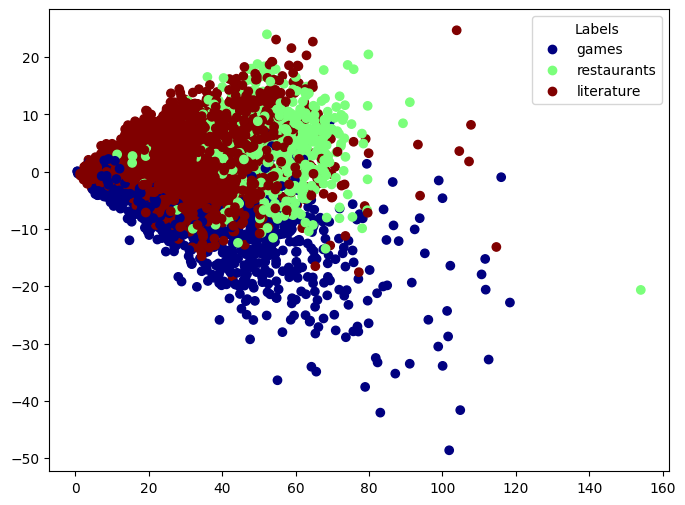

In [40]:
# Oppgave 2.2
scatter_plot(X_train, train_labels)

#### Oppgave 2.2 – Tekstbesvarelse
*Hva ser du på plottene?* 

I visualiseringen ser vi at de tre kategoriene danner ulike mønstre i det todimensjonale rommet. Kategorien games (blå prikker) ligger hovedsaklig på den negative delen av y-aksen og strekker seg relativt langt utover på x-aksen. Dette tyder på at dokumentene innen denne kategorien har særpregede trekk som gjør at de skiller seg tydlig ut i én retning i det reduserte vektorrommet.

Kategorien restaurants (grønne prikker) fremstår som mindre utbredt og ligger hovedsaklig mellom 20 og 80 på x-aksen og mellom -10 og 20 på y-aksen. Disse punktene overlapper delvis med literature, noe som kan indikere at ordbruken i disse kategoriene har visse likhetstrekk.

Kategorien literature (røde prikker) dekker et mindre areal og fremstår mer tettpakket, sårlig i området mellom -10 og 20 på y-aksen og 0 til 60 på x-aksen. Dette kan tyde på at dokumentene i denne kategorien er mer homogene når det gjelder ordbruk.

Selv om vi kan se en separasjon mellom kategoriene, spesielt for games, så finnes det også overlapp mellom klassene. Dette er forventet, ettersom dimensjonsreduksjonen fra 5000 til 2 dimensjoner innebærer at noe informasjon går tapt. Likevel indikerer visualiseringen at dokumentene inneholder strukturelle forskjeller som kan utnyttes av en klassifikasjonsmodell.

Games skiller seg mest ut, som mye sannsynlig handler om et mer spesialisert vokabulær med spillnavn, tekniske termer, sjargong osv. 
Literature er tettpakket som kan indikere et mer konsistent språk.
Restaurants overlapper, som kan komme av en mer generell sjargong for anmeldelser.

At games ligger tydlig separert langs y-aksen kan indikere at den første eller andre hovedkomponeneten i SVD fanger opp ord som er særlig karakteristiske for denne kategorien.

### Oppgave 2.3 – Vekting (3 poeng)

For å få bedre representasjoner kan det være lurt å vekte de ulike dimensjonene/trekkene ulikt, slik at de trekkene som er mer informative gis høyere vekt. Her skal dere bruke en type vekting kalt _term frequency–inverse document frequency (TF-IDF)_.

Scikit-learn har en innebygd klasse for TF-IDF kalt `TfidfTransformer` som dere skal bruke. Den tar dokumentvektorer fra `CountVectorizer` som input og gir ut nye, vektede vektorer som output.
I likhet med `CountVectorizer` må denne tilpasses treningssettet med `.fit()` før vi kan ta den i bruk. Dette er for å få gjort de nødvendige frekvenstellingene i dokumentene.

I denne oppgaven skal dere:

- Lage en TF-IDF-vektet representasjon av dokumentene
- Visualisere de vektede vektorene med `scatter_plot()`. Ser dere noen forskjell på resultatet sammenlignet med det dere fikk uten TF-IDF-vekting?


In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

/var/folders/fd/qtm25dgd2yd24d090kv2v7y80000gn/T/ipykernel_13973/3595697190.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("jet", len(set(labels)))


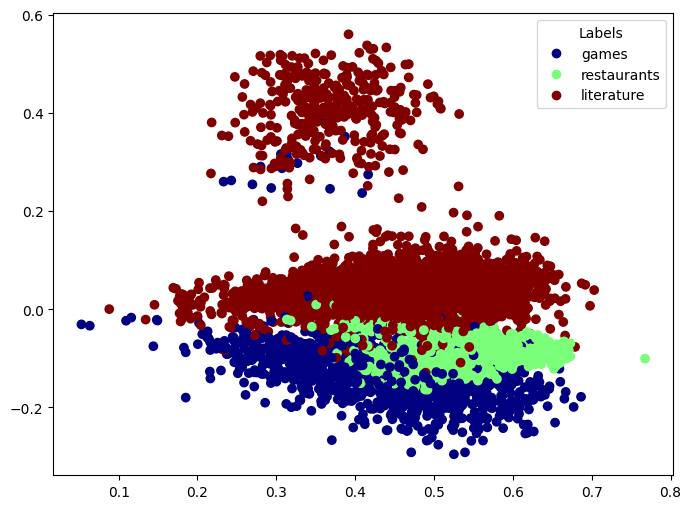

In [48]:
# Oppgave 2.3
tfidf = TfidfTransformer()

# Fit på train
tfidf.fit(X_train)

#Transformerer splittene
X_train_tfidf = tfidf.transform(X_train)
X_dev_tfidf = tfidf.transform(X_dev)
X_test_tfidf = tfidf.transform(X_test)

# Visualiser med scatter_plot
scatter_plot(X_train_tfidf, train_labels)

#### Oppgave 2.3 – Tekstbesvarelse
*Ser du noen forskjell mellom vektorene med og uten tf-idf?* 

Når vi visualiserer de TF-IDF-vektede dokumentene, så kan vi se en tydeligere struktur og skille mellom label-ene sammenlignet med representasjonen uten vekting. Games ligger hovedsaklig nederst i plottet, mellom 0.0 og -0.3 på y-aksen og fra 0.0 til 0.7 på x-aksen. Dette indikerer at dokumentene i denne kategorien deler karakteristiske trekk som skiller dem fra de andre klassene langs den andre hovedkompoenente. I tilegg finnes det en mindre, separat klynge blå prikker høyere oppe i plottet (rundt 0.2-0.4 på x- og y-aksen), dette kan tyde på at enkelte spillrelaterte tekster skiller seg tematisk fra majoriteten innen samme kategori.

Kategorien restaurants ligger generelt noe høyere enn games på y-aksen og er forskjøvet noe mot høyre på x-aksen. De befinner seg hovedsaklig mellom 0.0 til -0.2 på y-aksen og mellom 0.3 til 0.7 på x-aksen. Antallet grønne prikker er lavest, noe som samsvarer med at dette er den minste klassen idatasettet. Det finnes noe overlapp med både games og literature, noe som indikerer at enkelte trekk kan være felles på tvers av kategoriene.

Literature er den største klyngen og ligger relativt jevnt fordelt over området -0.1 til 0.2 på y-aksen og 0.1 til 0.7 på x-aksen. I tillegg observeres en tydelig og større klynge øverst i plottet (fra 0.2 til 0.6 på y-aksen). Denne klyngen kan illustrere at TF-IDF fremhever bestemte ord og uttrykk som er særlig karakteristiske for litteraturanmeldelser, og som gir dem denne separasjonen.

Samlet sett ser vi at TF-DF vektingen fører til en mer strukturert og separert representasjon av kategoriene sammenlignet bruken av rene frekvenser. Dette kommer da av at TF-IDF nedvekter svært vanlige ord og vekter opp medr informative og kategorispesifikke ord. Resultatet er at dokumentene i større grad grupperes etter tematisk innhold fremfor generell ordbruk, noe som sannsynligvis vil gi bedre frunnlag for klassifikasjonen.


## Oppgave 3 – Klassifisering med *k*-NN

Nå er vi klare for å lage en klassifikator. Klassifikatoren skal la oss predikere hvilken kategori et gitt dokument tilhører.
For å gjøre dette skal vi bruke `KNeighborsClassifier` fra scikit-learn som baserer seg på _k_-NN-algoritmen.

Klassifikatoren trenes med `.fit()`, der vi sender inn treningsdataene. Etter dette kan vi predikere med `.predict()` på validerings- og testdata.  
For best resultat er det viktig at dataene vi trener med og de vi ønsker å predikere, er preprosessert på samme måte. For eksempel vil en klassifikator trent på data uten TF-IDF-vekting gi dårlige resultater for dokumentvektorer med TF-IDF.


For å måle hvor godt klassifikatoren klarer å klassifisere de ulike dokumentene kan vi bruke _nøyaktighet_ (engelsk: _accuracy_), som regnes ut basert på hvor mange vi klarte å predikere korrekt, delt på antall vi forsøkte å predikere totalt.

For å regne ut dette kan dere bruke funksjonen `accuracy_score()` fra scikit-learn, som tar inn to lister: først en liste de korrekte merkelappene til dataene, så en liste med merkelapper som klassifikatoren har predikert.

Alternativt kan vi bruke $F_{1}$-_mål_ (engelsk: $F_{1}$-_score_), som er et gjennomsnitt mellom _presisjon_ (engelsk: _precision_) og _sensitivitet_ (engelsk: _recall_). Dette kan vi regne ut ved å bruke `f1_score()` fra scikit-learn.  
Denne tar også inn de to listene som parametere, men siden vi her jobber med flere klasser, må vi endre parameteren `average` som spesifiserer hvordan snittet mellom klassene skal regnes ut. Her kan den settes til `'macro'`.


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

### Oppgave 3.1 – _k_-NN (3 poeng)

Lag en instans av `KNeighborsClassifier` der k = 1. Tren denne på treningsdataene (med TF-IDF-vekting) og gjør prediksjoner på valideringsdataene. Vis resultatene for både `accuracy_score()` og `f1_score()`. Gjør så det samme med en instans der k = 5000. 

Rapporter resultatene i en markdown-celle, der dere også skriver kort om hvordan disse resultatene kan knyttes til over- og undertilpasning.

In [ ]:
# Oppgave 3.1
# K = 1
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train_tfidf, train_labels)
pred_dev_1 = knn_1.predict(X_dev_tfidf)
acc_1 = accuracy_score(dev_labels, pred_dev_1)
f1_1 = f1_score(dev_labels, pred_dev_1, average="macro")

print("k=1")
print("Accuracy:", acc_1)
print("F1 (macro):", f1_1)

# K = 5000
knn_5000 = KNeighborsClassifier(n_neighbors=5000)
knn_5000.fit(X_train_tfidf, train_labels)
pred_dev_5000 = knn_5000.predict(X_dev_tfidf)
acc_5000 = accuracy_score(dev_labels, pred_dev_5000)
f1_5000 = f1_score(dev_labels, pred_dev_5000, average="macro")

print("\nk=5000")
print("Accuracy:", acc_5000)
print("F1 (macro):", f1_5000)

k=1
Accuracy: 0.8854679802955665
F1 (macro): 0.8496323018924494
k=5000
Accuracy: 0.6637931034482759
F1 (macro): 0.2659758203799654


#### Oppgave 3.1 – Tekstbesvarelse

_Rapporter resultatene og knytt de opp mot over- og undertilpasning._

For k=1, oppnådde modellen en accuracy på 0.885 og en macro F1-score på 0.850. Dette er relativt høye verdier, spesielt sammenlignet med resultatene for k=5000. Når k=1, baserer modellen prediksjonen på det ene nærmeste treningsdokumentet. Dette gjør modellen svært fleksibel og i stand til å tilpasse seg detaljer i treningsdataene. Samtidig innebærer dette høy varians, og modellen risikerer å overtilpasse (overfitting) ved å lære støy og tilfeldige variasjoner fremfor generelle mønstre. Likevel ser vi at modellen generaliserer relativt godt til valideringssettet, siden både accuracy og F1-score er høye.

For k=5000, oppnådde modellen en accuracy på 0.664 og en macro F1-score på 0.266. Her ser vi en reduksjon i F1-score. Med så høy k verdi vil klassifikasjonen basere seg på et svært stort antall naboer, noe som i praksis betyr at modellen i stor grad predikerer majoritetsklassen. Siden literature utgjør omtrent 66% av datasettet, vil modellen ofte velge denne klassen uavhengig av dokumentets faktiske innhold. Dette forklarer hvorfor accuracy fortsatt ligger rundt 0.66 (den tilsvarer majoritetsandelen), mens macro F1-score blir lavere, siden minoritetsklassene klassifiseres dårligere. Dette er altså en undertilpasning eller underfitting, der modellen er for streng i forhold til å fange opp de strukturelle forskjellene mellom klassene.

Resultatene illustrerer dermed bias-variance tradeof, altså lav k-verdi gir høy varians og risiko for overfitting, mens svært høy k gir høy bias og risiko for underfitting. Macro F1-score viser seg her å være et mer informativt mål enn accuracy, siden datasettet er ubalansert og accuracy alene kan gi et misvisende bilde av modellens faktiske ytelse.

### Oppgave 3.2 – Hyperparametertilpassing (5 poeng)

I _k_-NN er _k_ en hyperparameter. Ved å endre på verdien av _k_ vil vi få ulike resultater fra klassifikatoren.
Hvilken _k_-verdi som passer best er avhengig av datasett, preprosessering og vekting. Vi må derfor bare prøve oss fram til vi finner passende verdier.

I denne oppgaven skal vi prøve en rekke _k_-verdier for å se hva som gir best resultat.

Når dere skal finne den beste _k_-verdien, skal dere bruke valideringssettet.

Lag ei løkke som trener en _k_-NN-klassifikator for forskjellige verdier av _k_ fra 1 til 20.
For hver _k_-verdi skal dere teste både dataene med TF-IDF-vekting og dataene uten, og beregne enten nøyaktighet eller $F_1$-mål for hver av dem. Hvilket av målene dere bruker velger dere selv, men dere må skrive minst to setninger om hvilke fordeler og ulemper de to målene har. 

Lag en tabell der dere inkluderer resultatene deres og beskriv kort hva dere observerer.


In [59]:
# Oppgave 3.2
results = []

for k in range(1, 21):
    # Modell uten TF-IDF
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, train_labels)
    pred_dev = knn.predict(X_dev)
    f1_no_tfidf = f1_score(dev_labels, pred_dev, average="macro")

    # Modell med TF-IDF
    knn_tfidf = KNeighborsClassifier(n_neighbors=k)
    knn_tfidf.fit(X_train_tfidf, train_labels)
    pred_dev_tfidf = knn_tfidf.predict(X_dev_tfidf)
    f1_tfidf = f1_score(dev_labels, pred_dev_tfidf, average="macro")

    results.append((k, f1_no_tfidf, f1_tfidf))

# Skriver det ut som en markdown tabell:
print("| k | F1 uten TF-IDF | F1 med TF-IDF |")
print("|---|----------------|---------------|")

for k, f1_no, f1_tf in results:
    print(f"| {k} | {f1_no:.3f} | {f1_tf:.3f} |")

| k | F1 uten TF-IDF | F1 med TF-IDF |
|---|----------------|---------------|
| 1 | 0.897 | 0.850 |
| 2 | 0.904 | 0.972 |
| 3 | 0.898 | 0.970 |
| 4 | 0.903 | 0.982 |
| 5 | 0.896 | 0.984 |
| 6 | 0.906 | 0.986 |
| 7 | 0.885 | 0.985 |
| 8 | 0.893 | 0.991 |
| 9 | 0.888 | 0.994 |
| 10 | 0.892 | 0.992 |
| 11 | 0.885 | 0.993 |
| 12 | 0.898 | 0.993 |
| 13 | 0.884 | 0.993 |
| 14 | 0.896 | 0.993 |
| 15 | 0.895 | 0.993 |
| 16 | 0.893 | 0.994 |
| 17 | 0.893 | 0.990 |
| 18 | 0.897 | 0.990 |
| 19 | 0.887 | 0.992 |
| 20 | 0.886 | 0.995 |


#### Oppgave 3.2 – Tekstbesvarelse

_Inkluder en tabell og diskuter resultatene. Hva er styrkene og svakhetene til henholdsvis nøyaktighet og $F_1$-mål?_

Tabell:
| k | F1 uten TF-IDF | F1 med TF-IDF |
|---|----------------|---------------|
| 1 | 0.897 | 0.850 |
| 2 | 0.904 | 0.972 |
| 3 | 0.898 | 0.970 |
| 4 | 0.903 | 0.982 |
| 5 | 0.896 | 0.984 |
| 6 | 0.906 | 0.986 |
| 7 | 0.885 | 0.985 |
| 8 | 0.893 | 0.991 |
| 9 | 0.888 | 0.994 |
| 10 | 0.892 | 0.992 |
| 11 | 0.885 | 0.993 |
| 12 | 0.898 | 0.993 |
| 13 | 0.884 | 0.993 |
| 14 | 0.896 | 0.993 |
| 15 | 0.895 | 0.993 |
| 16 | 0.893 | 0.994 |
| 17 | 0.893 | 0.990 |
| 18 | 0.897 | 0.990 |
| 19 | 0.887 | 0.992 |
| 20 | 0.886 | 0.995 |


Testet k-verdier fra 1-20 og evaluerte modellene på valideringssettet ved hjelp av macro F1-score. Resultatene viser en tydelig forskjell mellom modellene med og uten TF-IDF-vekting.

For moellen uten TF-IDF ligger F1-score relativt stabilt rundt 0.88-0.91 for alle k-verdier. Det er små variasjoner, men ingen dramatisk forbedring ved å øke k. Dette tyder på at rå frekvenstellingsvektorer gir en viss klassifiseringsstyrke, men at modellen ikke får særlig bedre generalisering ved å justere k innen dette intervallet. 

For modellen med TF-IDF ser vi en forbedring. Allerede ved k=2, oppnås en F1-score på 0.972, og for k-verdier mellom 4 og 20 ligger F1-score svært høyt, mellom 0.982 og 0.995. Den beste ytelsen oppnås ved k=20 med en F1-score på 0.995. Dette indikerer at TF-IDF-vektingen gir langt mer diskriminerende representasjoner av dokumentene. Når vanlige og lite informative ord nedvektes, og mer kategorispesifikke ord får høyere vekt, blir avstanen mellom dokumenter i ulike klasser tydeligere, noe som gjør k-NN mer effektiv.

Vi ser også at modellen med TF-IDF ikke lider av tydlig undertilpasning selv ved høyere k-verdier innen intervallet 1-20. Dette kan tolkes som at dokumentrepresentasjonene er så godt separert at selv større nabolag fortsatt gir konsistente og riktige klassifikasjoner. I kontrast viste testen med k=5000 tidligere en kraftig reduksjon i F1-score (0.266), noe som illustrerer ekstrem undertilpasning når nesten ehele treningssettet brukes som naboer.

Nøyaktighet versus F1-score:
Nøyaktighet (accuracy) måler andelen korrekt klassifiserte dokumenter totalt. Fordelen med accuracy er at det er enkelt å tolke og gir et intuitivt mål på modellens ytelse. Ulempen er at det kan være misvisende ved ubalanserte datasett. I dette datasettet utgjør literature 66% av dokumentene. En modell som i stor grad predikerer majoritetsklassen kan derfor oppnå relativt høy accuracy uten å faktisk klassifisere minoritetsklassene godt.

Macro F1-score beregner F1-score for hver klasse separat og tar deretter gjennomsnittet. Dette gir lik vekt til alle klasser, uavhengig av størrelse. Fordelen er at målet gir et mer rettferdig bilde av ytelsen på ubalanserte datasett. Ulempen er at det kan være mindre intuitivt å tolke enn accuracy og mer sensitivt for små variasjer i minoritetsklassene.

I dette tilfellet gir macro F1-score et mer informativt bilde av modellens faktiske ytelse, spesielt siden vi ønsker god klassifisering av alle tre kategoriene, ikke bare majoritetsklassen.

### Oppgave 3.3 – Testing (4 poeng)

Dere skal nå ha funnet den kombinasjonen av _k_-verdi og representasjon (vektet/ikke-vektet) som oppnår best nøyaktighet på valideringssettet.  
I denne oppgaven skal dere se hvor godt denne verdien fungerer på testsettet. Testsettet skal være data som klassifikatoren ikke har "sett" før, hverken under trening eller under hyperparametertilpassing.

Dere skal nå trene en _k_-NN-klassifikator med den beste kombinasjonen av _k_-verdi og representasjon fra oppgave 3.2. Dere skal så gjøre prediksjoner på valideringssettet. For disse prediksjonene skal dere rapporterte:

- Nøyaktighet
- $F_1$-mål
- Presisjon
  - Gjøres med `precision_score()`. Denne tar samme parametere som `f1_score()`.
- Sensitivitet
  - Gjøres med `recall_score()`. Denne tar samme parametere som `f1_score()`.

Gjør deretter prediksjoner for det testsettet og rapporter de samme metrikkene. Hvordan er ytelsen på testsettet sammenlignet med valideringssettet?


In [60]:
# Oppgave 3.3
# Beste valg fra 3.2
best_k = 20
use_tfidf = True

# Velg riktige features
Xtr = X_train_tfidf if use_tfidf else X_train
Xdv = X_dev_tfidf if use_tfidf else X_dev
Xte = X_test_tfidf if use_tfidf else X_test

# Tren modell
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(Xtr, train_labels)


def report(split_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")
    prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
    print(f"{split_name}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  F1 (macro): {f1:.4f}")
    print(f"  Precision (macro): {prec:.4f}")
    print(f"  Recall (macro):    {rec:.4f}")


# Validering
pred_dev = knn.predict(Xdv)
report("Validation", dev_labels, pred_dev)

# Test
pred_test = knn.predict(Xte)
report("Test", test_labels, pred_test)

Validation:
  Accuracy:  0.9963
  F1 (macro): 0.9954
  Precision (macro): 0.9940
  Recall (macro):    0.9969
Test:
  Accuracy:  0.9915
  F1 (macro): 0.9914
  Precision (macro): 0.9920
  Recall (macro):    0.9908


#### Oppgave 3.3 – Tekstbesvarelse

_Hva ser dere av resultatene på testsettet?_

Basert på valideringsresultatene valgte vi k = 20 kombinert med TF-IDF-vektet representasjon, siden denne kombinasjonen ga høyest F1-score under hyperparametertilpasningen.

På valideringssettet oppnådde modellen en accuracy på 0.9963 og en macro F1-score på 0.9954. I tillegg var både presisjon (0.9940) og sensitivitet/recall (0.9969) svært høye. Dette indikerer at modellen klassifiserer dokumentene korrekt i nesten alle tilfeller, og at den presterer godt på alle tre klassene, ikke bare majoritetsklassen.

Ved evaluering på testsettet oppnådde modellen en accuracy på 0.9915 og en macro F1-score på 0.9914, med presisjon på 0.9920 og recall på 0.9908. Ytelsen på testsettet er svært lik den på valideringssettet, med kun en marginal reduksjon i score. Dette tyder på at modellen generaliserer svært godt til nye, usette data, og at den ikke har overtilpasset valideringssettet under hyperparametertilpasningen.

Den lille nedgangen fra validering til test er forventet og naturlig, ettersom testdataene ikke har vært brukt tidligere i prosessen. At forskjellen er så liten, viser at kombinasjonen av TF-IDF-representasjon og en moderat k-verdi gir en robust og stabil klassifikator for dette datasettet.

Samlet sett viser resultatene at modellen både har høy nøyaktighet og god balanse mellom presisjon og sensitivitet, og at den håndterer klasseubalansen på en tilfredsstillende måte.